In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
import seaborn as sns

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


checking outliners

<AxesSubplot: xlabel='SepalLengthCm'>

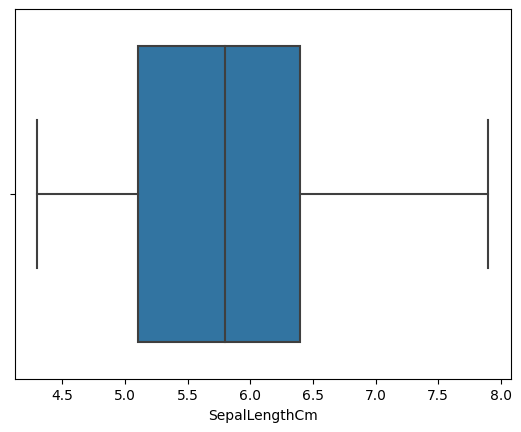

In [8]:
sns.boxplot(x=df['SepalLengthCm'])

<AxesSubplot: xlabel='SepalWidthCm'>

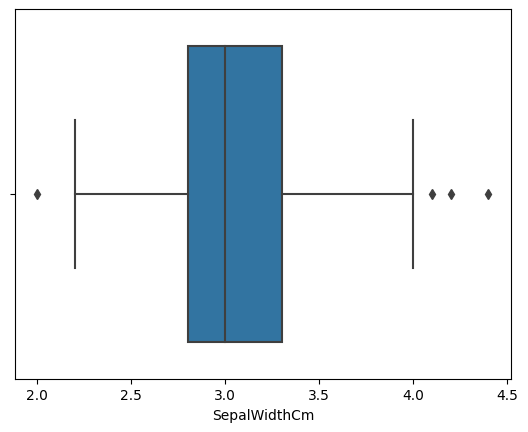

In [9]:
sns.boxplot(x=df['SepalWidthCm'])

<AxesSubplot: xlabel='PetalLengthCm'>

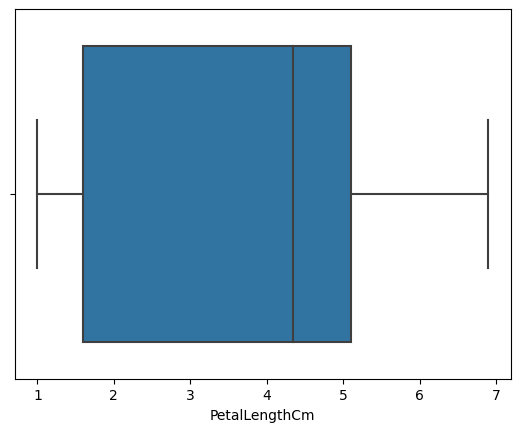

In [10]:
sns.boxplot(x=df['PetalLengthCm'])

<AxesSubplot: xlabel='PetalWidthCm'>

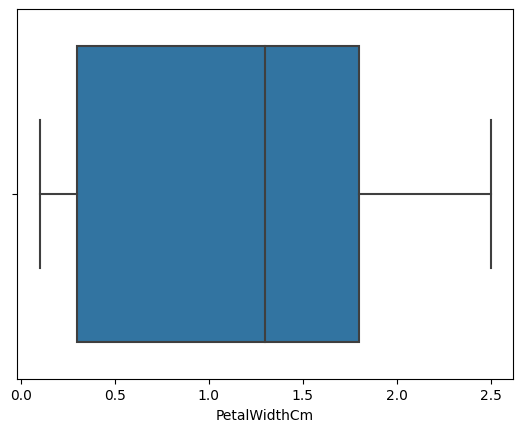

In [11]:
sns.boxplot(x=df['PetalWidthCm'])

applying scaling to the outliner detected field and performing feature scaling

In [12]:
from sklearn import preprocessing

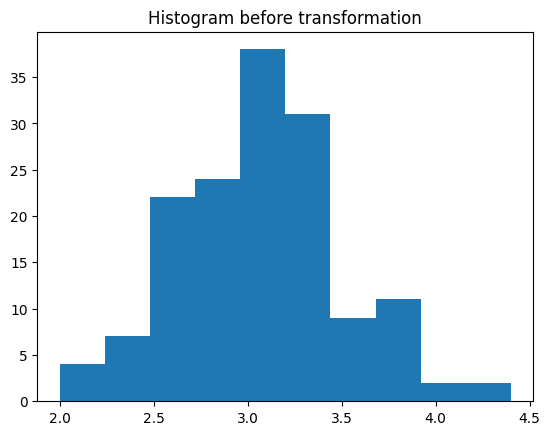

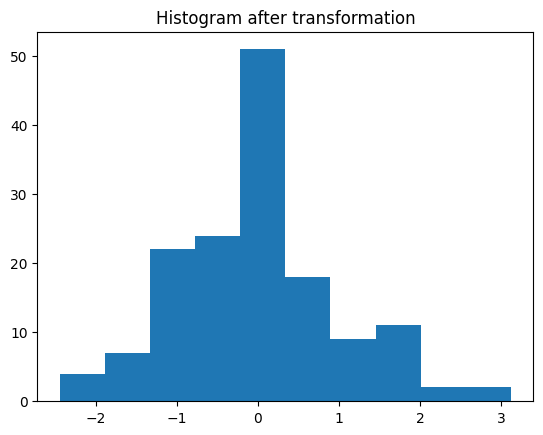

In [13]:
plt.hist(df['SepalWidthCm'])
plt.title('Histogram before transformation')
plt.show()


scaler=preprocessing.StandardScaler()
df['SepalWidthCm']=scaler.fit_transform(df['SepalWidthCm'].values.reshape(-1,1))
plt.hist(df['SepalWidthCm'])
plt.title('Histogram after transformation')
plt.show()


<AxesSubplot: xlabel='SepalWidthCm'>

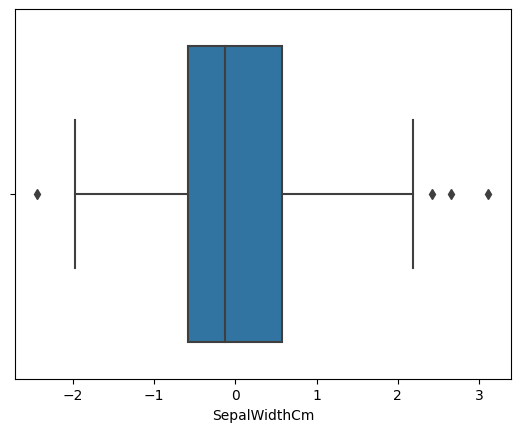

In [14]:
sns.boxplot(x=df['SepalWidthCm'])

In [15]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,1.032057,1.4,0.2,Iris-setosa
1,2,4.9,-0.124958,1.4,0.2,Iris-setosa
2,3,4.7,0.337848,1.3,0.2,Iris-setosa
3,4,4.6,0.106445,1.5,0.2,Iris-setosa
4,5,5.0,1.263460,1.4,0.2,Iris-setosa


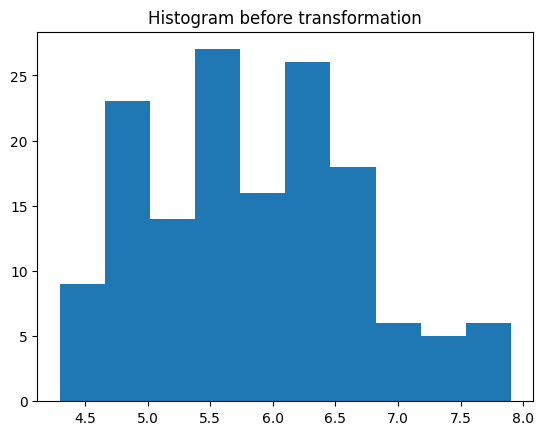

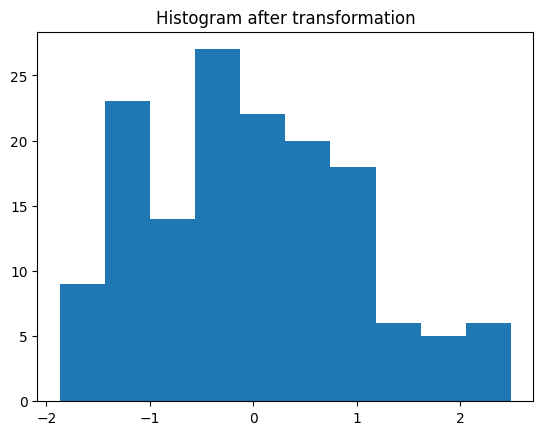

In [16]:
plt.hist(df['SepalLengthCm'])
plt.title('Histogram before transformation')
plt.show()


scaler=preprocessing.StandardScaler()
df['SepalLengthCm']=scaler.fit_transform(df['SepalLengthCm'].values.reshape(-1,1))
plt.hist(df['SepalLengthCm'])
plt.title('Histogram after transformation')
plt.show()


<AxesSubplot: xlabel='SepalLengthCm'>

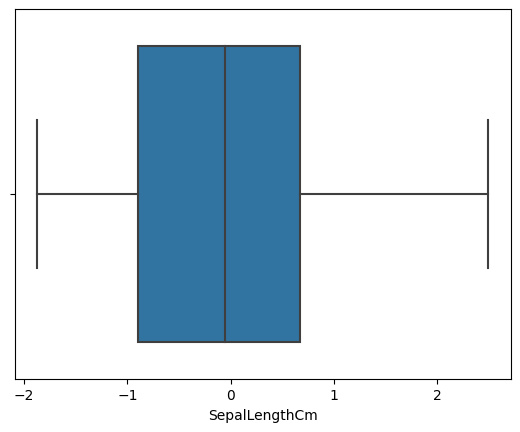

In [17]:
sns.boxplot(x=df['SepalLengthCm'])

Applying label encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [20]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,-0.900681,1.032057,1.4,0.2,0
1,2,-1.143017,-0.124958,1.4,0.2,0
2,3,-1.385353,0.337848,1.3,0.2,0
3,4,-1.506521,0.106445,1.5,0.2,0
4,5,-1.021849,1.263460,1.4,0.2,0


In [21]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

train and test data

In [22]:
X=df.drop('Species' , axis='columns')

In [23]:
y=df.Species

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

making the neural network

In [25]:
import tensorflow as tf

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 9219 (36.01 KB)
Trainable params: 9219 (36.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2/2 [=====

2/2 [==============================] - 0s 57ms/step - loss: 4.0723 - accuracy: 0.3417 - val_loss: 0.9271 - val_accuracy: 0.3667
Epoch 52/100
2/2 [==============================] - 0s 52ms/step - loss: 3.0480 - accuracy: 0.4083 - val_loss: 0.9362 - val_accuracy: 0.3667
Epoch 53/100
2/2 [==============================] - 0s 45ms/step - loss: 3.2271 - accuracy: 0.3917 - val_loss: 0.9481 - val_accuracy: 0.4000
Epoch 54/100
2/2 [==============================] - 0s 47ms/step - loss: 2.8785 - accuracy: 0.4500 - val_loss: 0.9590 - val_accuracy: 0.4000
Epoch 55/100
2/2 [==============================] - 0s 40ms/step - loss: 3.5847 - accuracy: 0.4917 - val_loss: 0.9784 - val_accuracy: 0.4000
Epoch 56/100
2/2 [==============================] - 0s 46ms/step - loss: 3.1267 - accuracy: 0.3833 - val_loss: 0.9867 - val_accuracy: 0.4000
Epoch 57/100
2/2 [==============================] - 0s 47ms/step - loss: 2.8506 - accuracy: 0.4333 - val_loss: 0.9858 - val_accuracy: 0.4000
Epoch 58/100
2/2 [========

In [29]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()

In [30]:
model_LR.fit(X_train,y_train)
print('model accuracy :',model_LR.score(X_test,y_test))

model accuracy : 1.0


C:\Users\91811\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
y_pred_prob = model_LR.predict(X_test) 


In [32]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
cm = confusion_matrix(y_test, y_pred_prob)

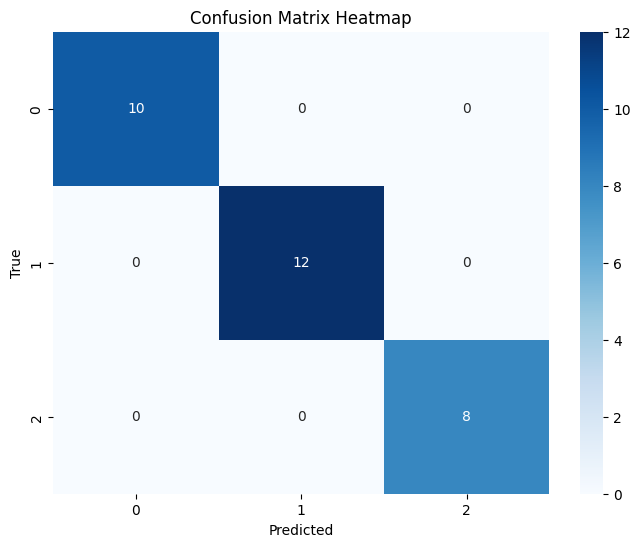

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [34]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_prob, target_names=le.classes_))